In [26]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [1]:
cd C:\Users\Harvy\Desktop

C:\Users\Harvy\Desktop


In [29]:
#reading the datasets
df1=pd.read_csv('student-mat.csv')
df2=pd.read_csv('student-por.csv')

In [30]:
#Outer join 2 datasets on following attributes
df=pd.merge(df1,df2,how='outer',on=["school","sex","age","address","famsize","Pstatus",
                            "Medu","Fedu","Mjob","Fjob","reason","nursery","internet",
                            "guardian","guardian","traveltime","studytime","failures",
                            "schoolsup","famsup","activities","higher","romantic",
                            "famrel","freetime","goout","Dalc","Walc","health","absences"])

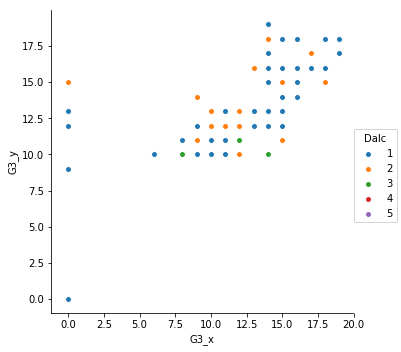

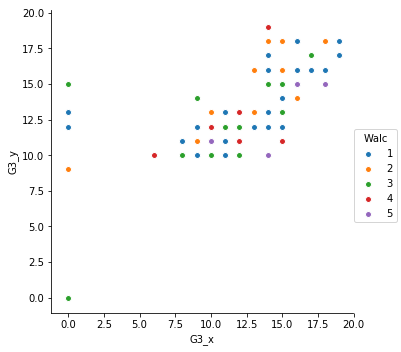

In [31]:
#Clearly the two tables has 85 common students(when compared using 29 attributes). 
#Now,here we have NaN values in grade field, so we need to examine average maths and portuguese grades
import seaborn as sns
sns.pairplot(x_vars=['G3_x'], y_vars=['G3_y'], data=df, hue="Dalc", size=5)
sns.pairplot(x_vars=['G3_x'], y_vars=['G3_y'], data=df, hue="Walc", size=5)

In [32]:
#CLearly Maths and portuguese marks seem to correlate highly with each other. 
#So we can directly merge the two datsets
df=[df1,df2]
df=pd.concat(df)
#Removing duplicates
df=df.drop_duplicates(["school","sex","age","address","famsize","Pstatus",
                            "Medu","Fedu","Mjob","Fjob","reason","nursery","internet",
                            "guardian","traveltime","studytime","failures",
                            "schoolsup","famsup","activities","higher","romantic",
                            "famrel","freetime","goout","Dalc","Walc","health","absences"])
df=df.reset_index(drop=True)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [33]:
#Normalizing absences value
fabs = df[["absences"]].values
fabs = np.where(fabs > 10, 1, 0)

#Combining weekend and other days consumption
alc = ((df[["Walc"]].values * 2) + (df[["Dalc"]].values * 5)/7)

In [34]:
res1 = pd.DataFrame(fabs)
res1.columns = ['fabs']

res2 = pd.DataFrame(alc)
res2.columns = ['alc']

res = df.join(res1, how='outer')
res = res.join(res2, how='outer')

del res['Walc']
del res['Dalc']
del res['absences']
res

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,health,G1,G2,G3,fabs,alc
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,3,5,6,6,0,2.714286
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,3,5,5,6,0,2.714286
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,3,7,8,10,0,7.428571
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,5,15,14,15,0,2.714286
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,5,6,10,10,0,4.714286
5,GP,M,16,U,LE3,T,4,3,services,other,...,no,5,4,2,5,15,15,15,0,4.714286
6,GP,M,16,U,LE3,T,2,2,other,other,...,no,4,4,4,3,12,12,11,0,2.714286
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,4,1,4,1,6,5,6,0,2.714286
8,GP,M,15,U,LE3,A,3,2,services,other,...,no,4,2,2,1,16,18,19,0,2.714286
9,GP,M,15,U,GT3,T,3,4,other,other,...,no,5,5,1,5,14,15,15,0,2.714286


In [35]:
#categorizing data
Y = res['G3']
X=res
del X['G3']
L = list(X.select_dtypes(['object']))
for col in L:
    X[col] = X[col].astype('category').cat.codes
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,health,G1,G2,fabs,alc
0,0,0,18,1,0,0,4,4,0,4,...,0,0,4,3,4,3,5,6,0,2.714286
1,0,0,17,1,0,1,1,1,0,2,...,1,0,5,3,3,3,5,5,0,2.714286
2,0,0,15,1,1,1,1,1,0,2,...,1,0,4,3,2,3,7,8,0,7.428571
3,0,0,15,1,0,1,4,2,1,3,...,1,1,3,2,2,5,15,14,0,2.714286
4,0,0,16,1,0,1,3,3,2,2,...,0,0,4,3,2,5,6,10,0,4.714286
5,0,1,16,1,1,1,4,3,3,2,...,1,0,5,4,2,5,15,15,0,4.714286
6,0,1,16,1,1,1,2,2,2,2,...,1,0,4,4,4,3,12,12,0,2.714286
7,0,0,17,1,0,0,4,4,2,4,...,0,0,4,1,4,1,6,5,0,2.714286
8,0,1,15,1,1,0,3,2,3,2,...,1,0,4,2,2,1,16,18,0,2.714286
9,0,1,15,1,0,1,3,4,2,2,...,1,0,5,5,1,5,14,15,0,2.714286


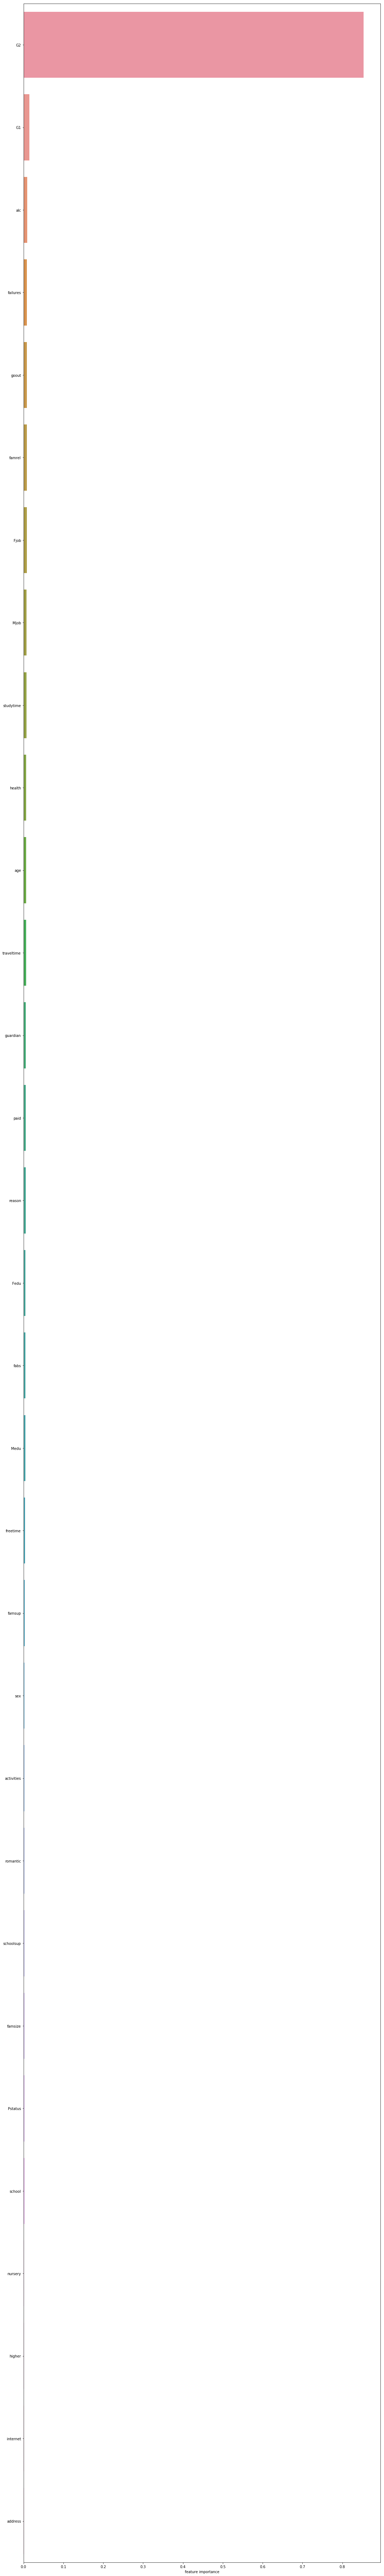

In [36]:
#checking importance of each attribute
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
rf.fit(x_train,y_train)
ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(15, 100))
sns.barplot(x=rf.feature_importances_[ranking], y=x_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

In [37]:
#G2 affects our final grade the most. We can also drop some unnecessary attributes to avoid overfitting .

In [48]:
#We will use the following 4 classifiers as it is a supervised regression model
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
names=['DecisionTreeRegressor','LinearRegression','Lasso','RandomForest']
clf_list=[DecisionTreeRegressor(),LinearRegression(),Lasso(),RandomForestRegressor(n_estimators = 500 ,  random_state = 0)]

In [52]:
#COMPARISION--1 : Using cross-fold validation 

for name,clf in zip(names,clf_list):
    print(name,end=': ')
    print(cross_val_score(clf,X,Y,cv=5).mean())


DecisionTreeRegressor: 0.5085573636517083
LinearRegression: 0.7926608465956635
Lasso: 0.8037092465107973
RandomForest: 0.7598348468893458


In [53]:
# Lasso outperforms here.
#Lasso performs better than linear regression because of regularisation.
#Tree based models are not designed to work with very sparse features. This may be the reason decision tree performs so bad
#and lasso outperforms random forest.
#Although random forest model is very good at handling tabular data with numerical features
#or categorical features with fewer than hundreds of categories. 
#Unlike linear models, random forests are able to capture non-linear interaction between the features and the target.

In [67]:
#COMPARISION---2 ROOT MEAN SQUARE ERROR(RMSE)
for name,clf in zip(names,clf_list):
    print(name,end=': ')
    clf.fit(x_train,y_train)
    meanSquaredError=mean_squared_error(y_test, clf.predict(x_test))
    rootMeanSquaredError = math.sqrt(meanSquaredError)
    print("RMSE:", rootMeanSquaredError)

DecisionTreeRegressor: RMSE: 2.7790620935621098
LinearRegression: RMSE: 1.876657688830224
Lasso: RMSE: 1.8650782837134114
RandomForest: RMSE: 1.8881918285710555


In [63]:
#DT ka yeh kyu kam hai yaar :(

In [66]:
#COMPARISION---3 MEAN ABSOLUTE ERROR(MAE)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
for name,clf in zip(names,clf_list):
    print(name,end=': ')
    clf.fit(x_train,y_train)
    print( mean_absolute_error(y_test,clf.predict(x_test))) 

DecisionTreeRegressor: 1.498422712933754
LinearRegression: 1.04693946942186
Lasso: 0.9489816187590475
RandomForest: 1.1250193330328977


In [ ]:
#The difference in MAE and RMSE values shows that the variance of the error is much greater in the prediction.

In [65]:
#COMPARISION---4 R SQUARED
from sklearn.metrics import r2_score
for name,clf in zip(names,clf_list):
    print(name,end=': ')
    clf.fit(x_train,y_train)
    print(r2_score(Y,clf.predict(X))) 

DecisionTreeRegressor: 0.8576431680468564
LinearRegression: 0.8319834206067771
Lasso: 0.8201754625886708
RandomForest: 0.9070959837634419


In [ ]:
#From all the 4 metrics it is clear that Random Forest is the best suited model for given dataset.